# DATA EXPLORATION AND PREPROCESSING (Part A)

# Question 1: Data Exploration

### I) Descriptive Statistics

In [1]:
# importing packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [2]:
# 1 - reading csv file and printing first 5 rows
df = pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1


In [3]:
# 2 - number of rows and columns
print("Number of rows in df:", df.shape[0])
print("Number of columns in df:", df.shape[1])

Number of rows in df: 788
Number of columns in df: 9


In [4]:
# 3 - calculating min, max, mean and std of the "Age" column
min = df["Age"].min()
max = df["Age"].max()
mean = df["Age"].mean()
std = df["Age"].std()

print("The min age of patients is:", min)
print("The max age of patients is:", max)
print("The mean age of patients is:", mean)
print("The std age of patients is:", std)

The min age of patients is: 12
The max age of patients is: 81
The mean age of patients is: 33.21573604060914
The std age of patients is: 11.819874550957666


In [50]:
mode = df["Age"].mode()
mode.count()

1

The modality of the "Age" column is Unimodal because one number has the highest occurences which is 22.

In [5]:
# 5 - calculating first and third quartile (and second)
q1 = df["Age"].quantile(.25)
q2 = df["Age"].quantile(.5)
q3 = df["Age"].quantile(.75)

print("The first quartile is", q1)
print("The third quartile is", q3)


The first quartile is 24.0
The third quartile is 41.0


In [6]:
# 6 - calculating interquartile range
q1 = df["Age"].quantile(.25)
q3 = df["Age"].quantile(.75)
iqr = q3-q1
print("The interquartile range is:", iqr)

The interquartile range is: 17.0


In [7]:
# 7 - Five Number Summary of Age
print("The Five Number Summary of 'Age'\n")
print("Min:", min)
print("Q1:", q1)
print("Q2:", q2)
print("Q3:", q3)
print("Max:", max)

The Five Number Summary of 'Age'

Min: 12
Q1: 24.0
Q2: 29.0
Q3: 41.0
Max: 81


### II) Data Visualisation

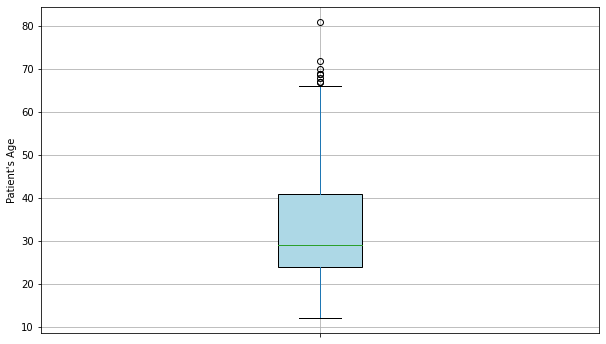

In [8]:
# 1 - boxplot of Age
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df.boxplot(column="Age", ax=ax, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# labels
ax.set_ylabel("Patient's Age")
ax.set_xticklabels([])
plt.show()


Above is the boxplot of the patients age. In blue you can see the IQR and the median being 29.  Above the upper whisker are the outliers, the highest one being 81 years old.

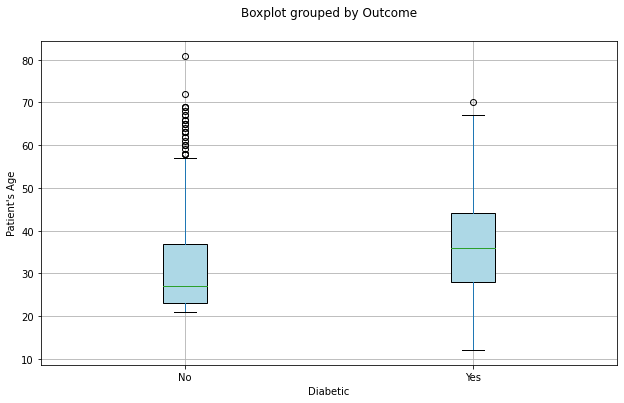

In [9]:
# 2 -  boxplot of the ‘Age’ column of the diabetic and no-diabetic groups side by side.
fig, ax = plt.subplots(figsize=(10, 6))
# group the data by 'Outcome'
boxplot = df.boxplot(column="Age", by="Outcome", ax=ax, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# labels
ax.set_xlabel("Diabetic")
ax.set_ylabel("Patient's Age")
ax.set_title("")
ax.set_xticklabels(["No", "Yes"])
plt.show()

3 - Analysis of the relationship between the patient's age and being diabetic

Most patients with diabetes tend to be between their late 20's and early 40's, the median age of people with diabetes being 37. The main group of patients without diabetes are younger and this may be because they haven't hit the age where diabetes tends to appear. 

Text(0.5, 1.0, 'Scatter Plot of Blood Pressure vs BMI')

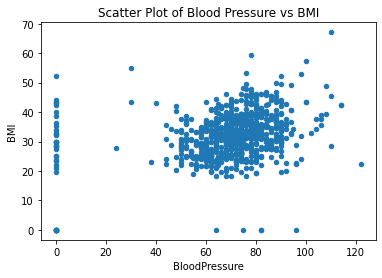

In [10]:
# 4 - scatter plot with the patients Blood Pressure on the x-axis and BMI on the y-axis 
df.plot.scatter(x="BloodPressure", y="BMI")
plt.title("Scatter Plot of Blood Pressure vs BMI")

In [51]:
# 5 - scatter plot with the patient’s Blood pressure on the x-axis and the patient’s BMI on 
# the y-axis, highlighting diabetic patients with different colours. The colouring label should be
# ‘diabetic’: yes and no.

# creating df conatining just diabetics (Outcome = 1) and nondiabetics (Outcome = 0)
diabetic = df[df["Outcome"] == 1]
nondiabetic = df[df["Outcome"] == 0]

diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
2,8,183,64.0,0,0,23.3,0.672,32,1
4,0,137,40.0,35,168,43.1,2.288,15,1
6,3,78,50.0,32,88,31.0,0.248,26,1
8,2,197,70.0,45,543,30.5,0.158,53,1


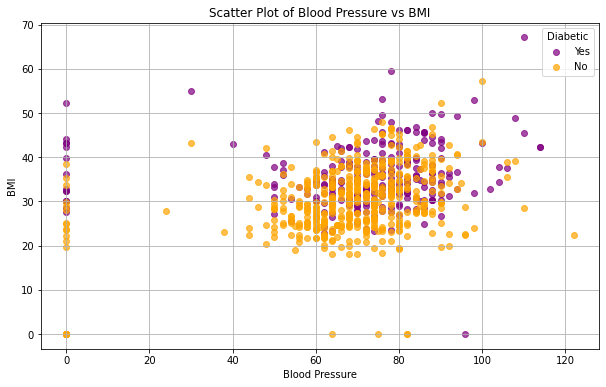

In [12]:
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(diabetic["BloodPressure"], diabetic["BMI"], label="Yes", alpha=.7, color='purple')
plt.scatter(nondiabetic["BloodPressure"], nondiabetic["BMI"], label="No", alpha=.7, color='orange')

# labels
plt.xlabel("Blood Pressure")
plt.ylabel("BMI")
plt.title("Scatter Plot of Blood Pressure vs BMI")
legend = plt.legend(title="Diabetic")

plt.grid(True)
plt.show()


6 - Analysis of the scatterplot in question 5, the relationship between BMI/Blood pressure and diabetes.

You can see from the scatter plot that the majority of diabetics have high BMI and BloodPressure. The non diabetics seem to have lower BMI/BloodPressure. This suggests there is a correlation between BMI/BloodPressure and having diabetes. 

### III) Data Filtering

In [13]:
# 1 - getting all patients with Insulin more than 400
insulin_gt400 = df.loc[df["Insulin"] > 400]
insulin_gt400.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70.0,45,543,30.5,0.158,53,1
13,1,189,60.0,23,846,30.1,0.398,59,1
111,8,155,62.0,26,495,34.0,0.543,46,1
153,1,153,82.0,42,485,40.6,0.687,23,0
186,8,181,68.0,36,495,30.1,0.615,60,1


In [14]:
# calculating how many patients are diabetic/non-diabetic
print("Diabetic:", len(insulin_gt400[insulin_gt400["Outcome"] == 1]))
print("Non diabetic:", len(insulin_gt400[insulin_gt400["Outcome"] == 0]))


Diabetic: 12
Non diabteic: 8


In [15]:
# 2 - getting patients with Insulin greater than 400 and Glucose greater than 175. 
insulin_glucose = df.loc[(df["Insulin"] > 400) & (df["Glucose"] > 175)]
insulin_glucose

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70.0,45,543,30.5,0.158,53,1
13,1,189,60.0,23,846,30.1,0.398,59,1
186,8,181,68.0,36,495,30.1,0.615,60,1
220,0,177,60.0,29,478,34.6,1.072,21,1
228,4,197,70.0,39,744,36.7,2.329,31,0
753,0,181,88.0,44,510,43.3,0.222,26,1


In [16]:
# calculating how many diabetic and non diabetic
print("Diabetic:", len(insulin_glucose[insulin_glucose["Outcome"] == 1]))
print("Non diabteic:", len(insulin_glucose[insulin_glucose["Outcome"] == 0]))


Diabetic: 5
Non diabteic: 1


Five patients are diabetic who's Insulin is greater than 400 and Glucose is greater than 175. One is non diabetic. This conveys that patients with high insulin and glucose levels have a higher chance of having diabetes

In [17]:
# 3 -  finding average Glucose level of a patient with more than 5 pregnancies and older than 45
pregnant_45 = df.loc[(df["Pregnancies"] > 5) & (df["Age"] > 45)]
pregnant_45


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
9,8,125,96.0,0,0,0.0,0.232,54,1
12,10,139,80.0,0,0,27.1,1.441,57,0
21,8,99,84.0,0,0,35.4,0.388,50,0
24,11,143,94.0,33,146,36.6,0.254,51,1
...,...,...,...,...,...,...,...,...,...
745,12,100,84.0,33,105,30.0,0.488,46,0
749,6,162,62.0,0,0,24.3,0.178,50,1
759,6,190,92.0,0,0,35.5,0.278,66,1
763,10,101,76.0,48,180,32.9,0.171,63,0


In [18]:
# calculating average
avg_preg45 = pregnant_45["Glucose"].mean()
print("The average Glucose level of a patient with more than 5 pregnancies and older than 45 is:", avg_preg45)

The average Glucose level of a patient with more than 5 pregnancies and older than 45 is: 135.36986301369862


In [19]:
# 4 - distinct values in the Pregnancies column
distinct = len(df["Pregnancies"].unique())
print("There are", distinct, "distinct values in the Pregnancy column")

There are 17 distinct values in the Pregnancy column


In [20]:
# 5 -  distinct values of the ‘pregnancies’ column along with the percentage of diabetic/no-diabetic of each value
pregnancies = df.groupby("Pregnancies")["Outcome"]
value_counts = pregnancies.value_counts(normalize = True)
perc = value_counts.unstack().fillna(0)
perc

Outcome,0,1
Pregnancies,,
0,0.660714,0.339286
1,0.773050,0.226950
2,0.824074,0.175926
3,0.644737,0.355263
4,0.666667,0.333333
5,0.637931,0.362069
6,0.680000,0.320000
7,0.434783,0.565217
8,0.450000,0.550000


Based on the amount of preganacies a patients had, here is the percentage that shows which are diabetic/non-diabetic.

# Question 2: Data Cleaning

### I) Duplicated Removal

In [21]:
# 1 - identifying duplicated records
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
783     True
784     True
785     True
786     True
787     True
Length: 788, dtype: bool

Above displays the whether the row is duplicated or not

In [22]:
# 2 - remove duplicates
# df2 is the new df without duplicates
df2 = df.drop_duplicates(keep=False)
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62.0,0,0,22.5,0.142,33,0
763,10,101,76.0,48,180,32.9,0.171,63,0
765,5,121,72.0,23,112,26.2,0.245,30,0
766,1,126,60.0,0,0,30.1,0.349,47,1


In [23]:
# 3 - finding rows and columns
print("Number of rows in df:", df2.shape[0])
print("Number of columns in df:", df2.shape[1])

Number of rows in df: 748
Number of columns in df: 9


In [24]:
# 4 - finding how many duplicated rows before duplicates were removed
duplicate_rows_count = df.duplicated().sum()
print("There was", duplicate_rows_count, "duplicate rows")

There was 20 duplicate rows


### II) Missing Values

In [25]:
# 1 - finding missing values in the "blood pressure" column
bloodpressure_missing = df2["BloodPressure"].isna().sum()
print("The number of missing values in BloodPressure are:", bloodpressure_missing)

The number of missing values in BloodPressure are: 23


In [26]:
# 2 - remove the missing records in the "BloodPressure" column
df2 = df2.dropna()

In [27]:
# 3 - new df with specific columns called df3
df3 = df2.filter(["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"], axis=1)
df3


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35,0,33.6,0.627,50
1,1,85,66.0,29,0,26.6,0.351,31
2,8,183,64.0,0,0,23.3,0.672,32
3,1,89,66.0,23,94,28.1,0.167,21
4,0,137,40.0,35,168,43.1,2.288,15
...,...,...,...,...,...,...,...,...
762,9,89,62.0,0,0,22.5,0.142,33
763,10,101,76.0,48,180,32.9,0.171,63
765,5,121,72.0,23,112,26.2,0.245,30
766,1,126,60.0,0,0,30.1,0.349,47


In [28]:
# 4 - Using sklearn’s train_test_split function to split the data into 90% training and 10% test
train, test = train_test_split(df3, test_size=0.10, random_state=50)
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
17,7,107,74.0,0,0,29.6,0.254,31
626,0,125,68.0,0,0,24.7,0.206,21
82,7,83,78.0,26,71,29.3,0.767,36
424,8,151,78.0,32,210,42.9,0.516,36
573,2,98,60.0,17,120,34.7,0.198,22
...,...,...,...,...,...,...,...,...
490,2,83,65.0,28,66,36.8,0.629,24
218,5,85,74.0,22,0,29.0,1.224,32
443,8,108,70.0,0,0,30.5,0.955,33
381,0,105,68.0,22,0,20.0,0.236,22


The training set contains 90% of the data and the test set contains 10%

In [29]:
# 5 - On  the  test  set,  set  the  Glucose  to  null  for  those  records.  And  keep  a  separate  copy  for evaluation in the following questions
# creating a copy for questions later
test2 = test.copy()
test2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
17,7,107,74.0,0,0,29.6,0.254,31
626,0,125,68.0,0,0,24.7,0.206,21
82,7,83,78.0,26,71,29.3,0.767,36
424,8,151,78.0,32,210,42.9,0.516,36
573,2,98,60.0,17,120,34.7,0.198,22
...,...,...,...,...,...,...,...,...
490,2,83,65.0,28,66,36.8,0.629,24
218,5,85,74.0,22,0,29.0,1.224,32
443,8,108,70.0,0,0,30.5,0.955,33
381,0,105,68.0,22,0,20.0,0.236,22


In [30]:
# setting glucose to null
test2["Glucose"] = np.NaN
test2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
17,7,NaN,74.0,0,0,29.6,0.254,31
626,0,NaN,68.0,0,0,24.7,0.206,21
82,7,NaN,78.0,26,71,29.3,0.767,36
424,8,NaN,78.0,32,210,42.9,0.516,36
573,2,NaN,60.0,17,120,34.7,0.198,22
...,...,...,...,...,...,...,...,...
490,2,NaN,65.0,28,66,36.8,0.629,24
218,5,NaN,74.0,22,0,29.0,1.224,32
443,8,NaN,70.0,0,0,30.5,0.955,33
381,0,NaN,68.0,22,0,20.0,0.236,22


In [31]:
# 6 -  Calculate the RMSEs for the imputed values of the test set
# getting mean glucose of train set
mean_glucose = train["Glucose"].mean()

# setting all glucose values in test set to the mean of train set Glucose
test2["Glucose"] = mean_glucose

In [32]:
test2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
17,7,121.263804,74.0,0,0,29.6,0.254,31
626,0,121.263804,68.0,0,0,24.7,0.206,21
82,7,121.263804,78.0,26,71,29.3,0.767,36
424,8,121.263804,78.0,32,210,42.9,0.516,36
573,2,121.263804,60.0,17,120,34.7,0.198,22
...,...,...,...,...,...,...,...,...
490,2,121.263804,65.0,28,66,36.8,0.629,24
218,5,121.263804,74.0,22,0,29.0,1.224,32
443,8,121.263804,70.0,0,0,30.5,0.955,33
381,0,121.263804,68.0,22,0,20.0,0.236,22


The Glucose column is now filled with the mean (121.263804).

In [33]:
# caluclating RMSEs
mse = mean_squared_error(test["Glucose"], test2["Glucose"])
rmse = np.sqrt(mse)

print("Based on the mean of Glucose\n")

print("The mean squared error is:", mse)
print("The root mean squared error is:", rmse)


Based on the mean of Glucose

The mean squared error is: 651.6186301163629
The root mean squared error is: 25.52682177859913


- MSE conveys the overall accuracy of a predictive model by finding the average of the squared errors. 
- RMSE displays the average error between the predicted values made by a model and the actual values.

The lower the MSE and RMSE the better. We will have to see how the other methods compare to this result.

In [34]:
# 7 - Fill in the missing values of the test set based on the median of the Glucose of the training set 
# (90%). Calculate the RMSEs for the imputed values of the test set
test3 = test.copy()

test3["Glucose"] = np.NaN
test3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
17,7,NaN,74.0,0,0,29.6,0.254,31
626,0,NaN,68.0,0,0,24.7,0.206,21
82,7,NaN,78.0,26,71,29.3,0.767,36
424,8,NaN,78.0,32,210,42.9,0.516,36
573,2,NaN,60.0,17,120,34.7,0.198,22
...,...,...,...,...,...,...,...,...
490,2,NaN,65.0,28,66,36.8,0.629,24
218,5,NaN,74.0,22,0,29.0,1.224,32
443,8,NaN,70.0,0,0,30.5,0.955,33
381,0,NaN,68.0,22,0,20.0,0.236,22


In [35]:
median_glucose = train["Glucose"].median()

# setting all glucose values in test set to the median of train set Glucose
test3["Glucose"] = median_glucose

In [36]:
test3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
17,7,116.5,74.0,0,0,29.6,0.254,31
626,0,116.5,68.0,0,0,24.7,0.206,21
82,7,116.5,78.0,26,71,29.3,0.767,36
424,8,116.5,78.0,32,210,42.9,0.516,36
573,2,116.5,60.0,17,120,34.7,0.198,22
...,...,...,...,...,...,...,...,...
490,2,116.5,65.0,28,66,36.8,0.629,24
218,5,116.5,74.0,22,0,29.0,1.224,32
443,8,116.5,70.0,0,0,30.5,0.955,33
381,0,116.5,68.0,22,0,20.0,0.236,22


Glucose column is filled with the median of the training set Glucose column

In [37]:
# caluclating RMSEs
mse = mean_squared_error(test["Glucose"], test3["Glucose"])
rmse = np.sqrt(mse)

print("Based on the median of Glucose\n")
print("The mean squared error is:", mse)
print("The root mean squared error is:", rmse)


Based on the median of Glucose

The mean squared error is: 647.7842465753424
The root mean squared error is: 25.451605972420335


These MSE and RMSE values are both very similar to the results based off the mean 

In [38]:
# 8 - using scikit-learn SimpleImputer with the 'most_frequent' strategy, and calculating RMSE
test4 = test.copy()

test4["Glucose"] = np.NaN
test4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
17,7,NaN,74.0,0,0,29.6,0.254,31
626,0,NaN,68.0,0,0,24.7,0.206,21
82,7,NaN,78.0,26,71,29.3,0.767,36
424,8,NaN,78.0,32,210,42.9,0.516,36
573,2,NaN,60.0,17,120,34.7,0.198,22
...,...,...,...,...,...,...,...,...
490,2,NaN,65.0,28,66,36.8,0.629,24
218,5,NaN,74.0,22,0,29.0,1.224,32
443,8,NaN,70.0,0,0,30.5,0.955,33
381,0,NaN,68.0,22,0,20.0,0.236,22


In [39]:
# checking the most freq number in original test set
train["Glucose"].mode()[0]

100

In [40]:
# imputing with SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")

# fitting on training set
imputer.fit(train)
test4 = imputer.transform(test4)


In [41]:
column_list = test.columns.tolist()

test4 = pd.DataFrame(test4, columns=column_list)
test4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7.0,100.0,74.0,0.0,0.0,29.6,0.254,31.0
1,0.0,100.0,68.0,0.0,0.0,24.7,0.206,21.0
2,7.0,100.0,78.0,26.0,71.0,29.3,0.767,36.0
3,8.0,100.0,78.0,32.0,210.0,42.9,0.516,36.0
4,2.0,100.0,60.0,17.0,120.0,34.7,0.198,22.0
...,...,...,...,...,...,...,...,...
68,2.0,100.0,65.0,28.0,66.0,36.8,0.629,24.0
69,5.0,100.0,74.0,22.0,0.0,29.0,1.224,32.0
70,8.0,100.0,70.0,0.0,0.0,30.5,0.955,33.0
71,0.0,100.0,68.0,22.0,0.0,20.0,0.236,22.0


The Glucose column is now filled with the "most frequent" value from the training set (100) 

In [42]:
# caluclating RMSEs
mse = mean_squared_error(test["Glucose"], test4["Glucose"])
rmse = np.sqrt(mse)

print("Based on the SimpleImputer of Glucose\n")
print("The mean squared error is:", mse)
print("The root mean squared error is:", rmse)

Based on the SimpleImputer of Glucose

The mean squared error is: 985.3561643835617
The root mean squared error is: 31.39038331055487


The MSE here is a lot higher than the previous MSE values. The RMSE value is also higher than previous values but not by much. This conveys to me that SimpleImputer is not as accurate as using the mean or median to predict values.

In [43]:
# 9 - Using scikit-learn KNNImputer (for neighbours = 3), and calculate RMSE.
test5 = test.copy()

test5["Glucose"] = np.NaN
test5


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
17,7,NaN,74.0,0,0,29.6,0.254,31
626,0,NaN,68.0,0,0,24.7,0.206,21
82,7,NaN,78.0,26,71,29.3,0.767,36
424,8,NaN,78.0,32,210,42.9,0.516,36
573,2,NaN,60.0,17,120,34.7,0.198,22
...,...,...,...,...,...,...,...,...
490,2,NaN,65.0,28,66,36.8,0.629,24
218,5,NaN,74.0,22,0,29.0,1.224,32
443,8,NaN,70.0,0,0,30.5,0.955,33
381,0,NaN,68.0,22,0,20.0,0.236,22


In [44]:
# imputing with KNNImputer
imputer = KNNImputer(n_neighbors=3)

# fitting on training set
imputer.fit(train)
test5 = imputer.transform(test5)

In [45]:
test5 = pd.DataFrame(test5, columns=column_list)
test5

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7.0,140.333333,74.0,0.0,0.0,29.6,0.254,31.0
1,0.0,102.333333,68.0,0.0,0.0,24.7,0.206,21.0
2,7.0,110.000000,78.0,26.0,71.0,29.3,0.767,36.0
3,8.0,116.333333,78.0,32.0,210.0,42.9,0.516,36.0
4,2.0,99.000000,60.0,17.0,120.0,34.7,0.198,22.0
...,...,...,...,...,...,...,...,...
68,2.0,123.666667,65.0,28.0,66.0,36.8,0.629,24.0
69,5.0,96.666667,74.0,22.0,0.0,29.0,1.224,32.0
70,8.0,146.333333,70.0,0.0,0.0,30.5,0.955,33.0
71,0.0,102.333333,68.0,22.0,0.0,20.0,0.236,22.0


In [46]:
# caluclating RMSEs
mse = mean_squared_error(test["Glucose"], test5["Glucose"])
rmse = np.sqrt(mse)

print("Based on the KNNImputer of Glucose\n")
print("The mean squared error is:", mse)
print("The root mean squared error is:", rmse)

Based on the KNNImputer of Glucose

The mean squared error is: 585.0152207001523
The root mean squared error is: 24.187087892099626


KNNImputer works very well in predicting values. The MSE and RMSE are lower than all the prior results which shows me that it is very effective.

(10) Which Imputer is better?
 
The KNNImputer is better as the MSE and RMSE is a lot lower than SimpleImputer. The lower the RMSE the better the model performance. In this case KNN is a lot better.